In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import pandas as pd
import numpy as np
import gzip
import json
import math
from datetime import datetime
from IPython.display import display
%matplotlib inline

In [2]:
currency_pairs = ['USDT_BTC', 'BTC_ETH', 'BTC_XMR', 'BTC_XRP', 'BTC_FCT', 'BTC_NAV', 'BTC_DASH', 'BTC_MAID', 'BTC_ZEC']
currency_pair = currency_pairs[0]

In [3]:
folder = '../data/'
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(folder)) for f in fn]
datafiles = sorted([f for f in files if f.endswith('.log.gz')])
print("Number of datafiles to extract from: {}".format(len(datafiles)))
print("First file: {}".format(datafiles[0]))
print("Last file : {}".format(datafiles[-1]))

Number of datafiles to extract from: 92571
First file: ../data/2016-11-08/poloniex_full_2016-11-08T10:00:09.955811.log.gz
Last file : ../data/2017-01-11/poloniex_full_2017-01-11T17:46:05.128887.log.gz


In [4]:
from manage_orderbooks import *
from orderbook_trade_simulator import *

In [5]:
filename = '../data/snapshots/orderbooks_USDT_BTC_range1.15_samplesNone_snapshot2017-01-11T17:19.dict'
orderbooks, timestamps = load_orderbook_snapshot(infile=filename, first_line=0, last_line=1000)
# display(timestamps)
print(len(orderbooks[0]))

# orderbooks = orderbooks[:1000]

100%|██████████| 1000/1000 [00:12<00:00, 91.36it/s]

Loaded Orderbooks: 1000
908


In [6]:
display(timestamps[0][:-10])

u'2016-11-08T10:00'

Period 1: volume=40, limit=708.1


/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


  Traded: 15.45505799 shares

Period 2: volume=24.54494201, limit=708.1
  Traded: 9.45250816 shares

Period 3: volume=15.09243385, limit=708.1
  Traded: 1.80895279 shares

Period 4: volume=13.28348106, limit=708.1


/usr/lib64/python2.7/site-packages/pandas/core/generic.py:5128: RuntimeWarning: invalid value encountered in absolute
  return np.abs(self)


Period 5: volume=13.28348106, limit=708.1
Period 6: volume=13.28348106, limit=708.1
Period 7: volume=13.28348106, limit=708.1
Period 8: volume=13.28348106, limit=708.1
  Traded: 6.46918128 shares

Period 9: volume=6.81429978, limit=708.1
Period 10: volume=6.81429978, limit=708.1
Run out of time (t=0).
Trade remaining 6.8143/6.8143 shares for current market order price
No shares left at t=0, Done!
  Traded: 6.81429978 shares

Done after 10 order_periods
Total costs: 66.4530478439, cotal cashflow: -28275.4520907


,ASK,BID,CENTER,LIMIT,SPREAD,TIMESPAN,VOLUME,avg,cashflow,cost,cost_avg,high,low,volume_left,volume_traded
2016-11-08T10:00,705.45,705.00,705.224976,708.1,0.45,1,40.000000,706.88592,-10924.962862,25.669961,1.660944,708.10,705.450000,24.544942,15.455058
2016-11-08T10:01,705.45,703.80,704.624678,708.1,1.65,1,24.544942,706.53801,-6678.556284,12.411443,1.313034,706.81,705.450000,15.092434,9.452508
2016-11-08T10:02,705.45,703.80,704.624678,708.1,1.65,1,15.092434,705.45000,-1276.125746,0.407058,0.225024,705.45,705.450000,13.283481,1.808953
2016-11-08T10:03,708.18,703.80,705.987736,708.1,4.38,1,13.283481,NaN,0.000000,0.000000,NaN,0.00,inf,13.283481,0.000000
2016-11-08T10:04,708.18,703.80,705.987736,708.1,4.38,1,13.283481,NaN,0.000000,0.000000,NaN,0.00,inf,13.283481,0.000000
2016-11-08T10:05,708.18,703.80,705.987736,708.1,4.38,1,13.283481,NaN,0.000000,0.000000,NaN,0.00,inf,13.283481,0.000000
2016-11-08T10:06,708.18,703.80,705.987736,708.1,4.38,1,13.283481,NaN,0.000000,0.000000,NaN,0.00,inf,13.283481,0.000000
2016-11-08T10:07,705.00,704.11,704.554906,708.1,0.89,1,13.283481,707.52000,-4577.075109,14.846896,2.295024,707.52,705.000000,6.814300,6.469181
2016-11-08T10:08,708.18,704.11,706.143045,708.1,4.07,1,6.814300,NaN,0.000000,0.000000,NaN,0.00,inf,6.814300,0.000000
2016-11-08T10:09,707.15,704.11,705.628909,708.1,3.04,1,6.814300,707.15000,-4818.732089,13.117690,1.925024,707.15,707.150000,0.000000,6.814300


 #####   TRADE Number 10   #####
Purchase history


{'705.0': 1.2e-05,
 '705.45': 6.858105590000001,
 '706.17': 0.052837839999999997,
 '706.19': 0.64532266000000005,
 '706.41': 0.045817419999999998,
 '706.81': 7.5297190599999997,
 '706.89': 0.10516049,
 '707.15': 6.8142997799999998,
 '707.18': 7.9885557299999999,
 '707.33': 0.26000000000000001,
 '707.5': 0.00042999999999999999,
 '707.52': 8.0477047200000005,
 '707.6': 0.00011,
 '707.61': 0.0027245099999999999,
 '707.7': 0.00068999999999999997,
 '707.8': 0.00075000000000000002,
 '707.82': 0.0030015100000000002,
 '707.83': 0.0066845100000000003,
 '707.84': 1.63626418,
 '707.9': 0.00084000000000000003,
 '708.0': 0.00020000000000000001,
 '708.1': 0.00076999999999999996}

Sell history


{}

Last trade


{'707.15': 6.8142997799999998}

Last trade  : 6.8143/6.8143 shares
Total trades: 40.0000/40.0000 shares
Spread: 4.07 (bid: 704.11, ask: 708.18)
Adjusted Orderbook:


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
989,0.001250,703.700000,bid,0.879625,3383.089266,0.996540
990,1.621835,703.710000,bid,1141.301226,3382.209641,0.996554
991,3.182611,704.110000,bid,2240.908414,2240.908414,0.997121
992,0.000000,706.143045,center,0.000000,0.000000,1.000000
1012,0.403454,708.180000,ask,285.717770,285.717770,1.002885
1013,0.000640,708.200000,ask,0.453248,286.171018,1.002913
1014,0.000700,708.400000,ask,0.495880,286.666898,1.003196


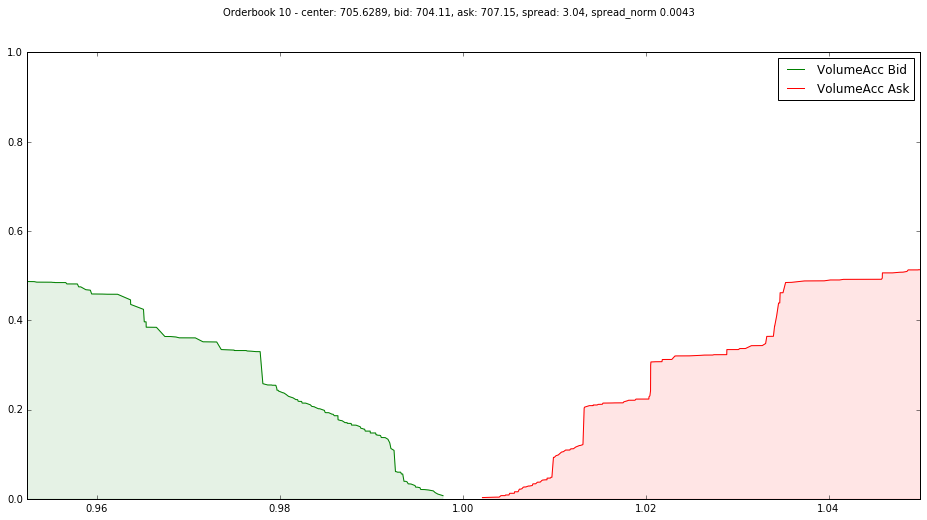

In [8]:
# import warnings
# warnings.filterwarnings('error')

ots = OrderbookTradingSimulator()

vol = 40
period_length = 1
lim = 708.1
order_periods = 10
must_trade = False

ob = orderbooks[0]

for i in range(order_periods):
    if i == order_periods-1:
        must_trade = True
    
    print("Period {}: volume={}, limit={}".format(i+1, vol, lim))
    new_ob = ots.trade_timespan(orderbooks[i*period_length:(i+1)*period_length],
                                timestamps[i*period_length],
                                timespan=period_length, must_trade=must_trade,
                                volume=vol, limit=lim, verbose=False)
    vol = ots.history.volume_left.values[-1]
    
    last_trade = ots.history.volume_traded.values[-1]
    if last_trade != 0:
        print("  Traded: {} shares\n".format(last_trade))
    
    if abs(vol) == 0:
        print("Done after {} order_periods".format(i+1))
        print("Total costs: {}, cotal cashflow: {}".format(sum(ots.history.cost), sum(ots.history.cashflow)))
        break
    elif vol > 0:
        pass
        #lim += 1
    elif vol < 0:
        pass
        #lim -= 1
display(ots.history)
ots.summarize(new_ob)
    

# new_ob = ots.trade_timespan(orderbooks[timespan:timespan+timespan], volume=vol, limit=706, verbose=True, timespan=timespan)
plot_orderbook(new_ob, title = "Orderbook {}".format(ots.t), normalized=True, range_factor=1.05)

In [ ]:
ots = OrderbookTradingSimulator()

vol = 2

ob = orderbooks[0]
new_ob = ots.trade(orderbooks[0], volume=vol, limit=None, verbose=True)
plot_orderbook(new_ob, title = "Orderbook {}".format(ots.t), normalized=True, range_factor=1.05)
trade_counter = 1

In [ ]:
center = orderbooks[0][orderbooks[0].Type=='center'].Price.values[0]
bid = orderbooks[0][orderbooks[0].Type=='bid'].Price.values[-1]
ask = orderbooks[0][orderbooks[0].Type=='ask'].Price.values[0]
print("Bid:    {}".format(bid))
print("Center: {}".format(center))
print("Ask:    {}\n".format(ask))

result = 0
trade_vol = -10
limit=704
trade_info = place_order(orderbooks[0], trade_vol, limit=limit)
cash_flow = trade_info['cashflow']
trade_vol -= trade_info['amount_fulfilled']

display(trade_info)
display(orderbook_preview(ob, 3))

#cash_flow = 0
minute = 1
for i, ob in enumerate(orderbooks[1:]):
    if abs(trade_vol) < 1.0e-10:
        break
        
    
    print("timesteps: {} ==> {}, {}".format(minute, cash_flow, trade_vol))
    if abs(trade_vol) > 1.0e-10 and i == len(orderbooks[1:])-1:
        print("TRADE!!!")
        # trade always in last Timestep
        trade_info = place_order(ob,  trade_vol, limit=None, trade_history=trade_info['trade_history'])
        cash_flow += trade_info['cashflow']
        trade_vol -= trade_info['amount_fulfilled']
    
    elif abs(trade_vol) > 1.0e-10:
        print("trade_vol", trade_vol)
        trade_info = place_order(ob,  trade_vol, limit=limit, trade_history=trade_info['trade_history'])
        cash_flow += trade_info['cashflow']
        trade_vol -= trade_info['amount_fulfilled']

    display(trade_info)
    
    minute += 1
    
    print("")
    
    print("trade_vol: {:1.4f}, center: {:1.4f}, limit: {}".format(trade_vol, ob[ob.Type=='center'].Price.values[0], limit))
print("timesteps: {} ==> {}, {}".format(minute, cash_flow, trade_vol))

display(orderbook_preview(ob, 3))

In [ ]:
range_factor = 1.01
# plot_orderbook(data[0], normalized=True, range_factor=range_factor)
print(len(orderbooks))
for idx in [1, 5000, 25000, -1]:
    print(idx, timestamps[idx])
    display(orderbook_preview(orderbooks[idx], 3))
    plot_orderbook(orderbooks[idx], title=timestamps[idx], normalized=True, range_factor=range_factor)